# Ideal Rankine Cycle calculations

**Adriaan van Niekerk** <br>
Apr 21, 2020

https://www.adriaansblog.com/post/ideal-rankine-cycle/

## The problem

Consider the following question:

Determine the efficiency of a Rankine cycle using steam as the working fluid in which the condenser pressure is 10 kPa. The boiler pressure is 2 MPa. The steam leaves the boiler as saturated vapor.

## Initiate PYroMat and configure its units:

The first thing that we need to do before we start with solving the problem, is to import the necessary packages and configure PYroMat to use the correct units:

In [1]:
import pyromat as pm

pm.config["unit_pressure"] = "kPa"
pm.config["def_p"] = 100

mp_water = pm.get("mp.H2O")

To determine the cycle efficiency, we must calculate the turbine work, the pump work, and the heat transfer to the steam in the boiler. We do this by considering a control surface around each of these components in turn. In each case the thermodynamic model is the steam tables, and the process is steady state with negligible changes in kinetic and potential energies.

## The pump

First, consider the pump:

In [3]:
#saturated liquid, thus x = 0
p1 = 10 # <--given
T1 = mp_water.Ts(p=p1)[0]
s1 = mp_water.ss(p=p1)[0]
p2 = 2000 # <--given and converted to kPa
s2= s1
v = 1/mp_water.ds(p=p1)[0]

w_p = v*(p2-p1)
print(f"Work required by pump: {round(float(w_p),1)} kJ/kg")

Work required by pump: 2.0 kJ/kg


After the work required by the pump is calculated, the enthalpy value after the pump (point 2) can be calculated:

In [4]:
h1 = mp_water.hs(p=p1)[0]
h2 = h1+w_p
T2 = mp_water.T_h(p=p2,h=h2)

print(f"h2 = {round(float(h2),1)} kJ/kg")

h2 = 193.8 kJ/kg


## The boiler

Next, lets consider the boiler:

In [5]:
# steam leaves the boiler as saturated vapor, thus x = 1
p3 = p2
T3 = mp_water.Ts(p=p3)

h3 = mp_water.hs(p=p3)[1]
s3dash = mp_water.ss(p=p3)[0]
T3dash = T3
s3 = mp_water.ss(p=p3)[1]
q_H = h3-h2

print(f"Heat input by boiler: {round(float(q_H),1)} kJ/kg")

Heat input by boiler: 2604.5 kJ/kg


## The turbine

Now, we consider the turbine:

In [6]:
p4 = p1
s4 = s3
T4, x = mp_water.T_s(s=s4,p=p4, quality=True)
h4 = mp_water.h(p=p4,x=x)
w_t = h3-h4
print(f"Quality of low pressure steam: {round(float(x),4)}")
print(f"Work generated by turbine: {round(float(w_t),1)} kJ/kg")

Quality of low pressure steam: 0.7587
Work generated by turbine: 791.7 kJ/kg


## The condenser

Finally, we consider the condenser:

In [7]:
q_L = h4-h1
print(f"Heat rejected by the condenser: {round(float(q_L),1)} kJ/kg")

Heat rejected by the condenser: 1814.8 kJ/kg


## Thermal efficiency

We can now calculate the thermal efficiency with

In [8]:
eta_th = (w_t-w_p)/q_H*100
print(f"Thermal efficiency is: {round(float(eta_th),1)}%")

Thermal efficiency is: 30.3%


## Plotting the Ideal Rankine Cycle

After all the points have been calculated, the Rankine Cycle can be shown visually on a graph.

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Text([6.43908243], [318.9556078], '(4)\nT = 318.96 K\nh = 2006.6 kJ/kg \ns = 6.339 kJ/kgK\nx = 0.759')

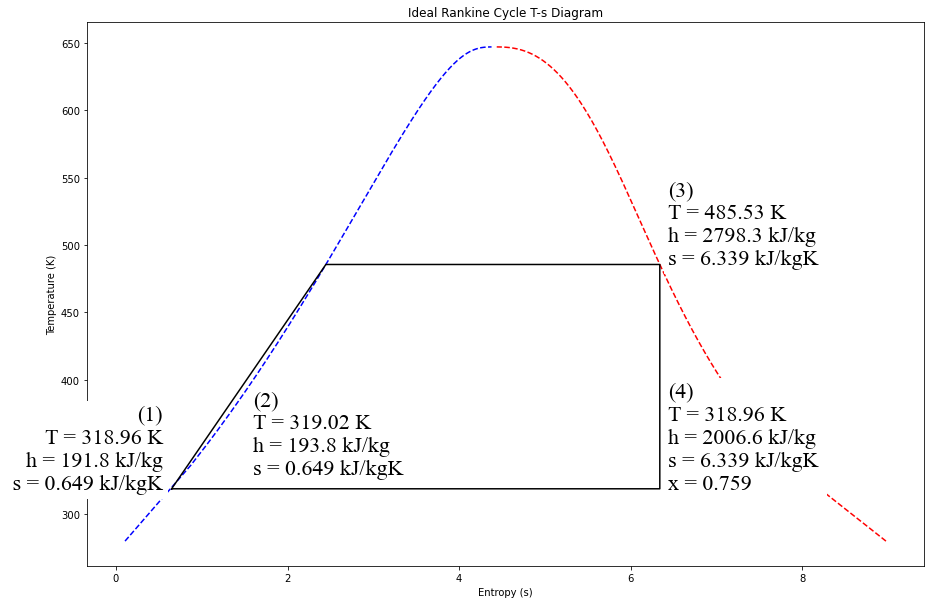

In [9]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(1,22063,1000)
T = mp_water.Ts(p=p)
s = mp_water.ss(p=p)


font = {'family' : 'Times New Roman',
        'size'   : 22}


plt.figure(figsize=(15,10))
plt.title('Ideal Rankine Cycle T-s Diagram')
plt.rc('font', **font)
plt.plot(s[0],T, 'b--')
plt.plot(s[1],T,'r--')
plt.ylabel('Temperature (K)')
plt.xlabel('Entropy (s)')
plt.plot([s1, s2, s3dash, s3, s4, s1],[T1, T2, T3dash, T3, T4, T1], 'black')

plt.text(s1-.1,T1,f'(1)\nT = {round(float(T1),2)} K\nh = {round(float(h1),1)} kJ/kg\n s = {round(float(s1),3)} kJ/kgK',
    ha='right',backgroundcolor='white')
plt.text(1.6,330,f'(2)\nT = {round(float(T2),2)} K\nh = {round(float(h2),1)} kJ/kg \ns = {round(float(s2),3)} kJ/kgK',
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T3,f'(3)\nT = {round(float(T3),2)} K\nh = {round(float(h3),1)} kJ/kg \ns = {round(float(s3),3)} kJ/kgK',
    ha='left',backgroundcolor='white')
plt.text(s4+.1,T4,f'(4)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \ns = {round(float(s4),3)} kJ/kgK\nx = {round(float(x),3)}',
    ha='left',backgroundcolor='white')